In [1]:
import pickle
from sqlalchemy import create_engine
import sys
import pandas as pd
import numpy as np
import secrets

In [2]:
# load db
db_conn_str = "mysql+pymysql://{:}:{:}@{:}/{:}".format(secrets.user, secrets.password, secrets.host, secrets.db)
db_conn = create_engine(db_conn_str)

df = pd.read_sql('SELECT * FROM labelled WHERE isHighlight IS NOT NULL', con=db_conn)
db_conn.dispose()

In [3]:
# load models
rf_model = pickle.load(open('rf_100t.sav', 'rb')) # currently just using this

In [4]:
# sample 100 random clips to classify
dataset = df.sample(100)

In [5]:
# classify using the model
y_predict_rf = rf_model.predict(dataset[['pitch', 'amplitude', 'subjectivity', 'polarity', 'pred_excitement']])
dataset['y_predict_rf'] = y_predict_rf

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [6]:
# get youtube embeded url
def formatYoutubeUrl(url, start, end):
  embed_url = url.replace("watch?v=", "embed/")
  params = "?start={:}&end={:}&autoplay=1".format(start, end)
  return embed_url + params

def printUrls(df):
    for idx, row in df.iterrows():
        print(formatYoutubeUrl(row['url'], row['start'], row['end']))

In [7]:
# all non-highlight clips in rf
non_highlight = dataset[dataset['y_predict_rf'] == 0]

# all non-highlight clips in rf
highlight = dataset[dataset['y_predict_rf'] == 1]

# print URLS 
print('=== NON-HIGHLIGHT ===')
printUrls(non_highlight[:10])

print('=== HIGHLIGHT ===')
printUrls(highlight[:10])

=== NON-HIGHLIGHT ===
https://www.youtube.com/embed/jQYSNq4qw18?start=536&end=540&autoplay=1
https://www.youtube.com/embed/J16IWnr_P8o?start=3964&end=3968&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=1612&end=1616&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=3742&end=3746&autoplay=1
https://www.youtube.com/embed/A_wk85oA0Rc?start=2026&end=2030&autoplay=1
https://www.youtube.com/embed/NN7UqP7n_jw?start=864&end=868&autoplay=1
https://www.youtube.com/embed/jQYSNq4qw18?start=3334&end=3338&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=3784&end=3788&autoplay=1
https://www.youtube.com/embed/A_wk85oA0Rc?start=1626&end=1630&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=1302&end=1306&autoplay=1
=== HIGHLIGHT ===
https://www.youtube.com/embed/ehMCxKaj5cA?start=146&end=150&autoplay=1
https://www.youtube.com/embed/XT5Cn6jg-IQ?start=576&end=580&autoplay=1
https://www.youtube.com/embed/A_wk85oA0Rc?start=594&end=598&autoplay=1
https://www.youtube.c

In [8]:
# try running prediction on 1 video
youtubeUrl = 'https://www.youtube.com/watch?v=-5NzaAt_wY0' # this url was chosen at random
dataset_by_url = df[df['url'] == youtubeUrl].copy()

In [9]:
# classify using different rf model
# classify using the model
y_predict_rf = rf_model.predict(dataset_by_url[['pitch', 'amplitude', 'subjectivity', 'polarity', 'pred_excitement']])
dataset_by_url['y_predict_rf'] = y_predict_rf

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [10]:
for idx, row in dataset_by_url.iterrows():
    print(formatYoutubeUrl(row['url'], row['start'], row['end']), "predicted: " ,row['y_predict_rf'])

https://www.youtube.com/embed/-5NzaAt_wY0?start=0&end=4&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2&end=6&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=4&end=8&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=6&end=10&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=8&end=12&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=10&end=14&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=12&end=16&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=14&end=18&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=16&end=20&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=18&end=22&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=20&end=24&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=22&end=26&autoplay=1 predicted:  0
https://www.

https://www.youtube.com/embed/-5NzaAt_wY0?start=744&end=748&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=746&end=750&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=748&end=752&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=750&end=754&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=752&end=756&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=754&end=758&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=756&end=760&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=758&end=762&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=760&end=764&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=762&end=766&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=764&end=768&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=766&end=770&autop

https://www.youtube.com/embed/-5NzaAt_wY0?start=1384&end=1388&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1386&end=1390&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1388&end=1392&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1390&end=1394&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1392&end=1396&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1394&end=1398&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1396&end=1400&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1398&end=1402&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1400&end=1404&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1402&end=1406&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1404&end=1408&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?s

https://www.youtube.com/embed/-5NzaAt_wY0?start=1942&end=1946&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=1944&end=1948&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=1946&end=1950&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=1948&end=1952&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1950&end=1954&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1952&end=1956&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1954&end=1958&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=1956&end=1960&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=1958&end=1962&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=1960&end=1964&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=1962&end=1966&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?s

https://www.youtube.com/embed/-5NzaAt_wY0?start=2150&end=2154&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2152&end=2156&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=2154&end=2158&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2156&end=2160&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2158&end=2162&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=2160&end=2164&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2162&end=2166&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2164&end=2168&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2166&end=2170&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2168&end=2172&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2170&end=2174&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?s

https://www.youtube.com/embed/-5NzaAt_wY0?start=2462&end=2466&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=2464&end=2468&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=2466&end=2470&autoplay=1 predicted:  1
https://www.youtube.com/embed/-5NzaAt_wY0?start=2468&end=2472&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2470&end=2474&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2472&end=2476&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2474&end=2478&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2476&end=2480&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2478&end=2482&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2480&end=2484&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?start=2482&end=2486&autoplay=1 predicted:  0
https://www.youtube.com/embed/-5NzaAt_wY0?s

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def secondsToTime(secs):
    m, s = divmod(secs, 60)
    return "{:}:{:}".format(m, s)

def realTimeHypeGraph(dataset):
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()

    x = []
    y1 = []

    for idx, row in dataset.iterrows():
        ax.clear()
        ax.set_ylim([-0.5, 2.5])
        
        videoTime = row['start'] / 60
        x.append(videoTime)
        y1.append(row['y_predict_rf'])

        ax.plot(x[-20:], y1[-20:], label='random_forest', alpha=0.7)
        
        plt.xlabel('Time (s)')
        plt.ylabel('Highlight')
        plt.legend()
        
        fig.canvas.draw()
        time.sleep(2)

In [12]:
from IPython.display import HTML

youtubeEmbedUrl = youtubeUrl.replace('watch?v=', 'embed/')
# Youtube
HTML("<iframe width='560' height='315' src='{:}'</iframe>".format(youtubeEmbedUrl))

C:\Users\eldri\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<IPython.core.display.Javascript object>


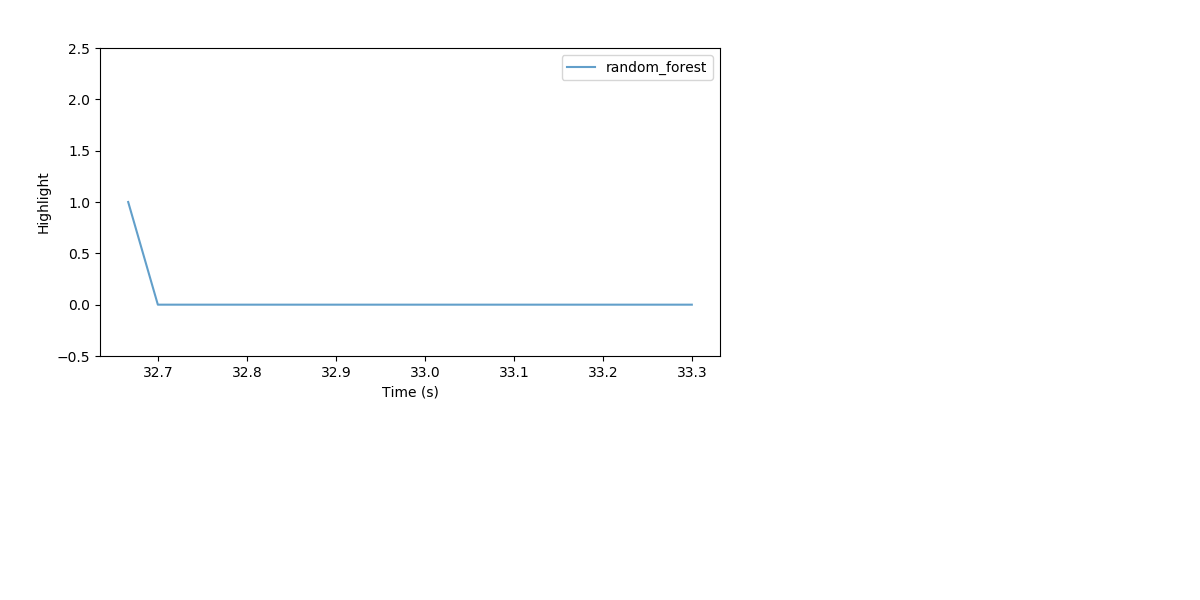

KeyboardInterrupt: 

In [13]:
# run this cell right before you click play on the youtube video
dataset = dataset_by_url[dataset_by_url['start'] >= 1800] # you can customize the start time here
realTimeHypeGraph(dataset)